<a href="https://colab.research.google.com/github/phamduyaaaa/Unicycle-Kinematic/blob/main/UniCycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

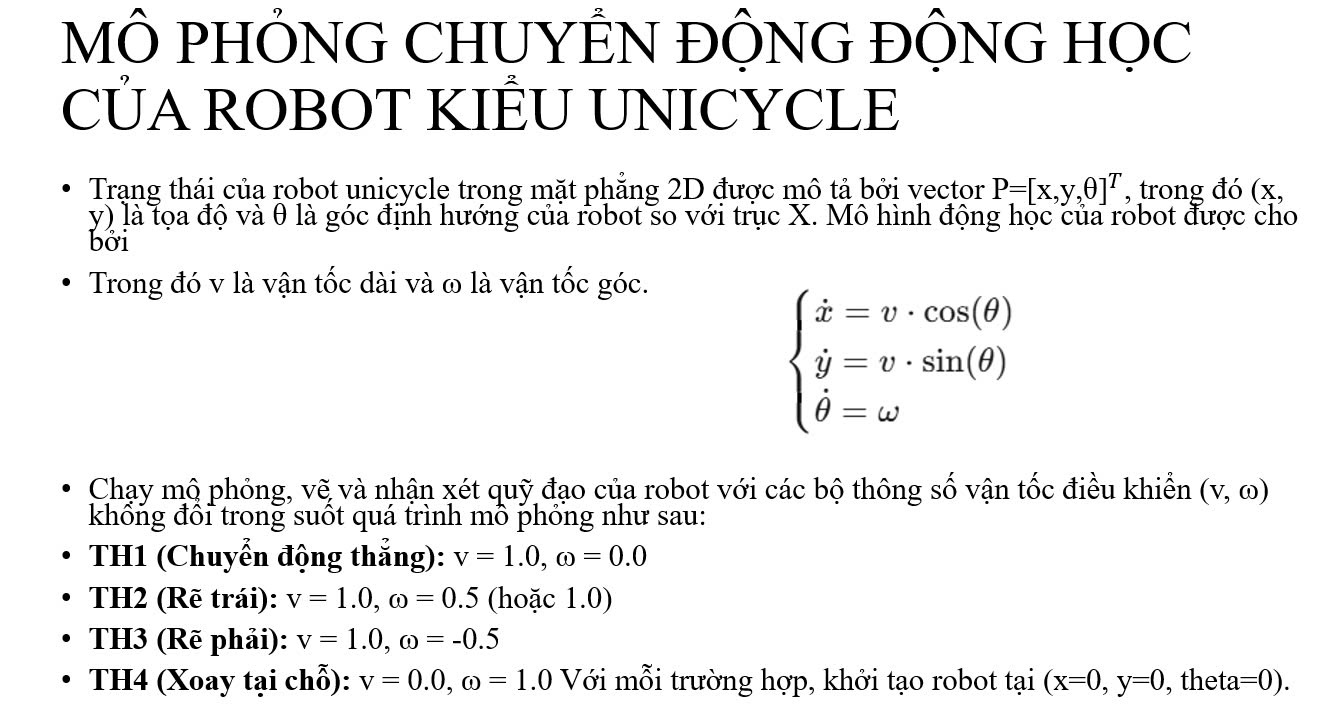

In [13]:
!pip install -q matplotlib ffmpeg

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Video
from IPython.display import HTML
from base64 import b64encode

In [10]:
X = 0
Y = 0
THETA = 60

In [18]:
def dong_hoc(v, w):
  x_dot = v * np.cos(THETA)
  y_dot = v * np.sin(THETA)
  omega_dot = w

  return x_dot, y_dot, omega_dot

In [27]:
def simulate_and_animate(v, omega, filename, total_time=10.0, dt=0.1):
    x, y, theta = 0.0, 0.0, 0.0
    xs, ys = [x], [y]

    for _ in np.arange(0, total_time, dt):
        x += v * np.cos(theta) * dt
        y += v * np.sin(theta) * dt
        theta += omega * dt
        xs.append(x)
        ys.append(y)

    fig, ax = plt.subplots()
    ax.set_xlim(min(xs) - 1, max(xs) + 1)
    ax.set_ylim(min(ys) - 1, max(ys) + 1)
    ax.set_aspect('equal')
    line, = ax.plot([], [], 'b-', label='Quỹ đạo')
    point, = ax.plot([], [], 'ro', label='Robot')
    ax.legend()

    def init():
        line.set_data([], [])
        point.set_data([], [])
        return line, point

    def update(i):
        line.set_data(xs[:i], ys[:i])
        # The change is here:  Wrap xs[i] and ys[i] in lists to make them sequences
        point.set_data([xs[i]], [ys[i]])
        return line, point

    ani = FuncAnimation(fig, update, frames=len(xs), init_func=init, blit=True, interval=50)

    ani.save(filename, writer='ffmpeg')
    plt.close(fig)


In [32]:
def display_video(filename):
    mp4 = open(filename,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML(f"""
    <video width=640 controls>
        <source src="{data_url}" type="video/mp4">
    </video>
    """)

In [40]:
x_dot_1, y_dot_1, omega_dot_1 = dong_hoc(1.0, 0.0)
x_dot_2, y_dot_2, omega_dot_2 = dong_hoc(1.0, 0.5)
x_dot_3, y_dot_3, omega_dot_3 = dong_hoc(1.0, -0.5)
print(f"TH1: X_DOT_1: {x_dot_1}, Y_DOT_1: {y_dot_1}, OMEGA_DOT_1 {omega_dot_1}")
print(f"TH1: X_DOT_2: {x_dot_2}, Y_DOT_1: {y_dot_2}, OMEGA_DOT_1 {omega_dot_2}")
print(f"TH1: X_DOT_3: {x_dot_3}, Y_DOT_1: {y_dot_3}, OMEGA_DOT_1 {omega_dot_3}")

TH1: X_DOT_1: -0.9524129804151563, Y_DOT_1: -0.3048106211022167, OMEGA_DOT_1 0.0
TH1: X_DOT_2: -0.9524129804151563, Y_DOT_1: -0.3048106211022167, OMEGA_DOT_1 0.5
TH1: X_DOT_3: -0.9524129804151563, Y_DOT_1: -0.3048106211022167, OMEGA_DOT_1 -0.5


In [39]:
simulate_and_animate(1.0, 0.0, "unicycle_th1.mp4")
display_video("unicycle_th1.mp4")

In [43]:
simulate_and_animate(1.0, 0.5, "unicycle_th2.mp4")
display_video("unicycle_th2.mp4")

In [46]:
simulate_and_animate(1.0, -0.5, "unicycle_th3.mp4")
display_video("unicycle_th3.mp4")

In [49]:
simulate_and_animate(0, 1, "unicycle_th4.mp4")
display_video("unicycle_th4.mp4")